In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

# Задание 3

Выгружаем данные

In [53]:
curs_data = pd.read_csv('Курс доллара, цена за барель.csv')

In [56]:
curs_data.head()

,Date,Цена нефти в долларах,Курс доллара к рублю,Цена нефти в рублях
0,"Dec 07, 2023",74.09,91.4250,6773.67825
1,"Dec 06, 2023",74.30,90.1775,6700.18825
2,"Dec 05, 2023",77.20,91.4650,7061.09800
3,"Dec 04, 2023",78.03,91.1900,7115.55570
4,"Dec 01, 2023",78.88,89.9400,7094.46720


Расчет цены нефти в рублях

In [55]:
curs_data['Цена нефти в рублях'] = curs_data['Цена нефти в долларах'] * curs_data['Курс доллара к рублю']

Очистка от выбросов

In [64]:
curs_data = curs_data.drop(189)

Построение точечного графика

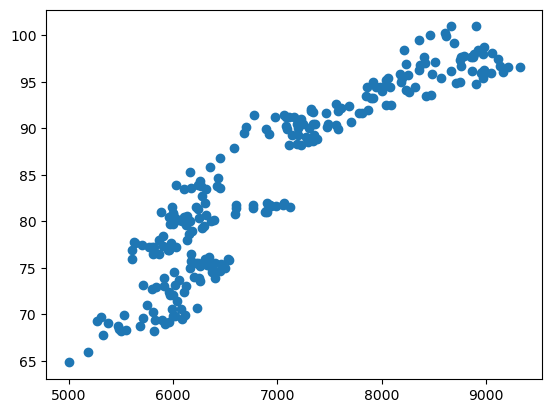

In [66]:
plt.scatter(curs_data['Цена нефти в рублях'], curs_data['Курс доллара к рублю'])

Прослеживается линейная зависимость между двумя величинами
Для того, чтобы удостовериться в этом построим линйеную регресиию

In [69]:
# Выделим переменные
x = curs_data["Цена нефти в рублях"]
y = curs_data["Курс доллара к рублю"]

# Построим модель
model = sm.OLS(y, x).fit()

# Выведем результаты
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Курс доллара к рублю   R-squared (uncentered):                   0.995
Model:                              OLS   Adj. R-squared (uncentered):              0.995
Method:                   Least Squares   F-statistic:                          5.366e+04
Date:                  Fri, 08 Dec 2023   Prob (F-statistic):                   1.09e-294
Time:                          01:14:37   Log-Likelihood:                         -800.31
No. Observations:                   252   AIC:                                      1603.
Df Residuals:                       251   BIC:                                      1606.
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
------------

In [70]:
import scipy.stats as stats

In [96]:
# Критическое значение критерия Стьюдента при уровне значимости 0.05 и 98 степенях свободы
stats.t.ppf(0.95, 251)

1.650947025187233

Значимость параметров модели можно проверить с помощью критерия Стьюдента. Для этого необходимо вычислить стандартную ошибку коэффициента и значение t-статистики. Значение t-статистики должно быть больше критического значения критерия Стьюдента, чтобы можно было сделать вывод о значимости коэффициента.

В нашем случае значение t-статистики равно 231.64, которое значительно больше критического значения критерия Стьюдента при уровне значимости 0.05, равного 1.65. Таким образом, можно сделать вывод о том, что коэффициент при переменной price_oil значим.

Таким образом, можно заключить, что между курсом доллара США к рублю и ценой на нефть существует линейная зависимость. 

Отразим прямую линейной зависимости на графике

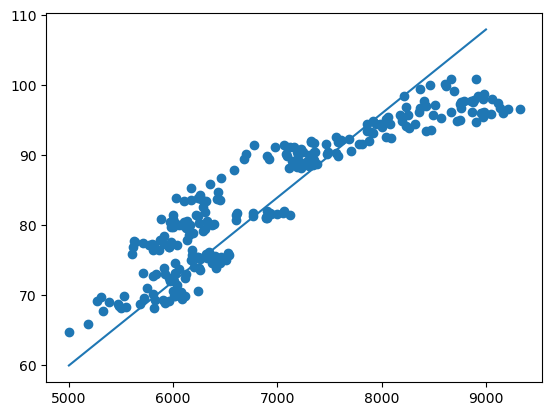

In [76]:
x = np.arange(5000, 9000)
y = 0.0120 * x + 5.18e-05
plt.plot(x, y)
plt.scatter(curs_data['Цена нефти в рублях'], curs_data['Курс доллара к рублю'])

# Задание 4

In [82]:
curs_data_log = pd.read_csv('Курс доллара, цена за барель.csv')

In [83]:
curs_data_log['Цена нефти в рублях'] = curs_data_log['Цена нефти в долларах'] * curs_data_log['Курс доллара к рублю']

Очистка от выбросов

In [84]:
curs_data_log = curs_data_log.drop(189)

In [87]:
curs_data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 252
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   252 non-null    object 
 1   Цена нефти в долларах  252 non-null    float64
 2   Курс доллара к рублю   252 non-null    float64
 3   Цена нефти в рублях    252 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.8+ KB


In [88]:
curs_data_log['Цена нефти в рублях, log'] = np.log(curs_data_log['Цена нефти в рублях'])

In [89]:
curs_data_log['Курс доллара к рублю, log'] = np.log(curs_data_log['Курс доллара к рублю'])

In [90]:
curs_data_log.head()

,Date,Цена нефти в долларах,Курс доллара к рублю,Цена нефти в рублях,"Цена нефти в рублях, log","Курс доллара к рублю, log"
0,"Dec 07, 2023",74.09,91.4250,6773.67825,8.820800,4.515519
1,"Dec 06, 2023",74.30,90.1775,6700.18825,8.809891,4.501780
2,"Dec 05, 2023",77.20,91.4650,7061.09800,8.862356,4.515956
3,"Dec 04, 2023",78.03,91.1900,7115.55570,8.870039,4.512945
4,"Dec 01, 2023",78.88,89.9400,7094.46720,8.867070,4.499143


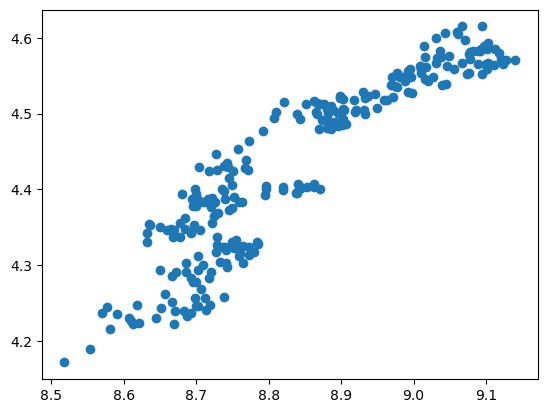

In [92]:
plt.scatter(curs_data_log['Цена нефти в рублях, log'], curs_data_log['Курс доллара к рублю, log'])

Прослеживается линейная зависимость между двумя величинами
Для того, чтобы удостовериться в этом построим линйеную регресиию

In [95]:
# Выделим переменные
x = curs_data_log["Цена нефти в рублях, log"]
y = curs_data_log["Курс доллара к рублю, log"]

# Построим модель
model = sm.OLS(y, x).fit()

# Выведем результаты
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Курс доллара к рублю, log   R-squared (uncentered):                   1.000
Model:                                   OLS   Adj. R-squared (uncentered):              1.000
Method:                        Least Squares   F-statistic:                          1.702e+06
Date:                       Fri, 08 Dec 2023   Prob (F-statistic):                        0.00
Time:                               01:59:39   Log-Likelihood:                          378.90
No. Observations:                        252   AIC:                                     -755.8
Df Residuals:                            251   BIC:                                     -752.3
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                               coef    std err    

In [97]:
# Критическое значение критерия Стьюдента при уровне значимости 0.05 и 98 степенях свободы
stats.t.ppf(0.95, 251)

1.650947025187233

Значимость параметров модели можно проверить с помощью критерия Стьюдента. Для этого необходимо вычислить стандартную ошибку коэффициента и значение t-статистики. Значение t-статистики должно быть больше критического значения критерия Стьюдента, чтобы можно было сделать вывод о значимости коэффициента.

В нашем случае значение t-статистики равно 1304.546, которое значительно больше критического значения критерия Стьюдента при уровне значимости 0.05, равного 1.65. Таким образом, можно сделать вывод о том, что коэффициент при переменной price_oil значим.

Таким образом, можно заключить, что между курсом доллара США к рублю и ценой на нефть существует линейная зависимость. 

Отразим прямую линейной зависимости на графике

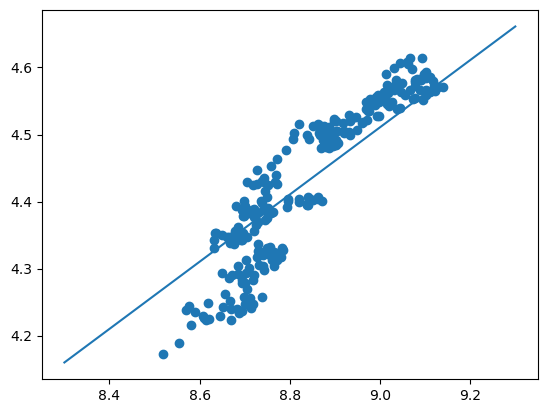

In [114]:
x = np.arange(8.3, 9.4)
y = 0.5012 * x + 0
plt.plot(x, y)
plt.scatter(curs_data_log['Цена нефти в рублях, log'], curs_data_log['Курс доллара к рублю, log'])